In [17]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [18]:
def cleanData(result_df): 
  for i in result_df.columns:
    column_names = i.split("_")
    if (len(column_names) > 2) and (column_names[-1] == '1'):
      result_df.rename(columns = {i: i.split("_")[0] + '_' + i.split("_")[1]}, inplace = True)
    elif (len(column_names) <= 2) and (column_names[-1] == '1'):  
      result_df.rename(columns = {i: i.split("_")[0]}, inplace = True)

In [19]:
def finalResultsMetrics(result_df):
  res = dict()
  col_names = list(result_df.columns)
  for col_name in col_names:
    if col_name == 'Unnamed: 0':
      continue
    res[col_name] = result_df[col_name].iloc[-1]
  
  return res

In [20]:
def plotResults(result_df):
  sns.set(rc = {'figure.figsize':(15, 8)})

  figADAM, axesADAM = plt.subplots(2, 2)

  # Accuracy 
  resAdamAccuracy = pd.melt(result_df[['val_accuracy', 'accuracy', 'epochs']], ['epochs'])
  sns.lineplot(x='epochs', y='value', hue='variable', data=resAdamAccuracy, ax=axesADAM[0, 0])

  # Precision
  resAdamPrecision = pd.melt(result_df[['val_precision', 'precision', 'epochs']], ['epochs'])
  sns.lineplot(x='epochs', y='value', hue='variable', data=resAdamPrecision, ax=axesADAM[0, 1])

  # Recall
  resAdamRecall = pd.melt(result_df[['val_recall', 'recall', 'epochs']], ['epochs'])
  sns.lineplot(x='epochs', y='value', hue='variable', data=resAdamRecall, ax=axesADAM[1, 0])

  # AUC
  resAdam_AUC = pd.melt(result_df[['val_auc', 'auc', 'epochs']], ['epochs'])
  sns.lineplot(x='epochs', y='value', hue='variable', data=resAdam_AUC, ax=axesADAM[1, 1])

  plt.show()

In [21]:
def addEpochs(history_model):
  epochs = np.arange(0, 200, 1, dtype=int)
  history_model['epochs'] = epochs

  return history_model

## Loads Result Data

In [22]:
history_model1 = pd.read_excel('/content/drive/MyDrive/Repository Projects/Skripsi/results/analisis arsitektur/callbacks 2/history_model1_cb2.xlsx') 
history_model2 = pd.read_excel('/content/drive/MyDrive/Repository Projects/Skripsi/results/analisis arsitektur/callbacks 2/history_model2_cb2.xlsx') 
history_model3 = pd.read_excel('/content/drive/MyDrive/Repository Projects/Skripsi/results/analisis arsitektur/callbacks 2/history_model3_cb2.xlsx')
history_model4 = pd.read_excel('/content/drive/MyDrive/Repository Projects/Skripsi/results/analisis arsitektur/callbacks 2/history_model4_cb2.xlsx') 

In [23]:
# add epochs to all history_model
history_model1 = addEpochs(history_model1)
history_model2 = addEpochs(history_model2)
history_model3 = addEpochs(history_model3)
history_model4 = addEpochs(history_model4)

## Testing 

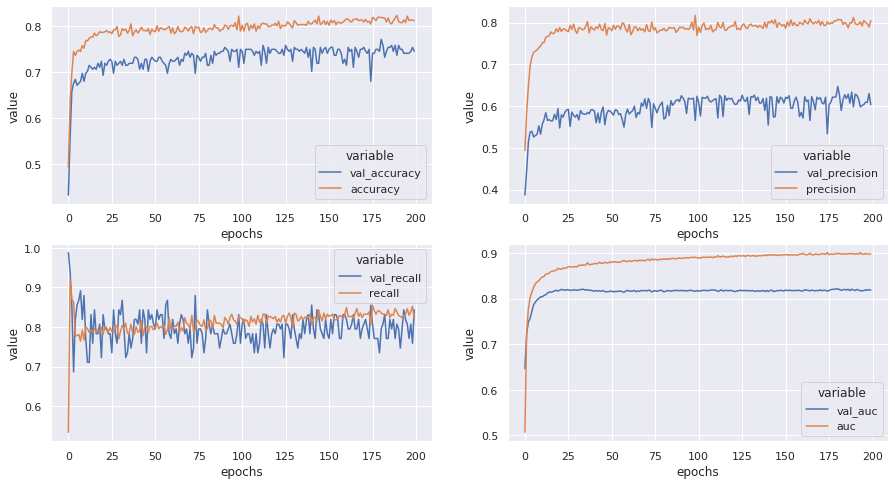

In [24]:
plotResults(history_model1)

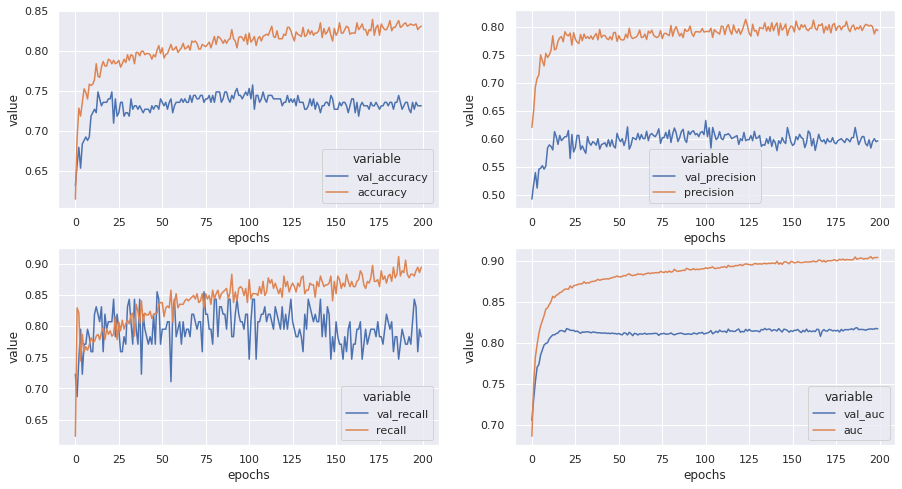

In [25]:
plotResults(history_model2)

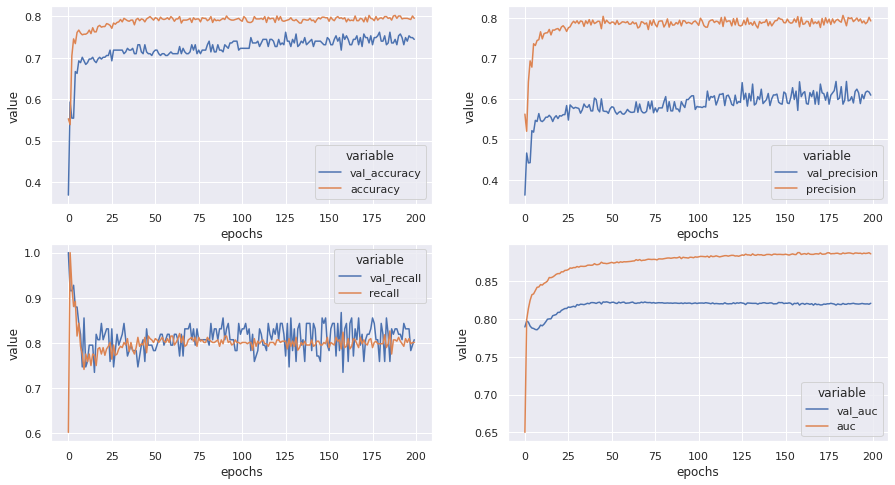

In [26]:
plotResults(history_model3)

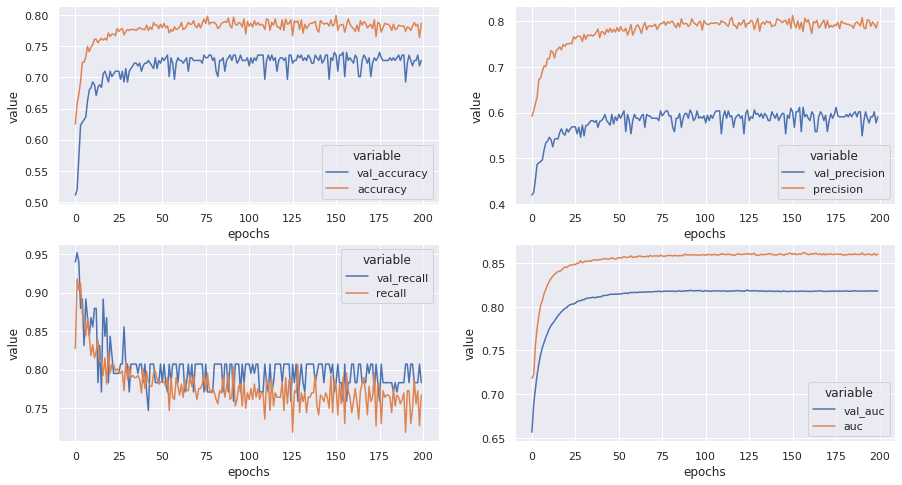

In [27]:
plotResults(history_model4)